# Libraries

In [188]:
# Base
import pandas as pd
import numpy as np
import os 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Data loading and cleaning

In [189]:
# load the data
dfSales = pd.read_csv("../data/Carseats.csv")

In [190]:
# check the data
dfSales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [191]:
# check the data types
dfSales.info()

# data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [192]:
# check for missing values
dfSales.isnull().sum()

# no missing values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [193]:
# summary statistics
dfSales.describe()

# standardizing might be a good idea

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Visualizations

/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


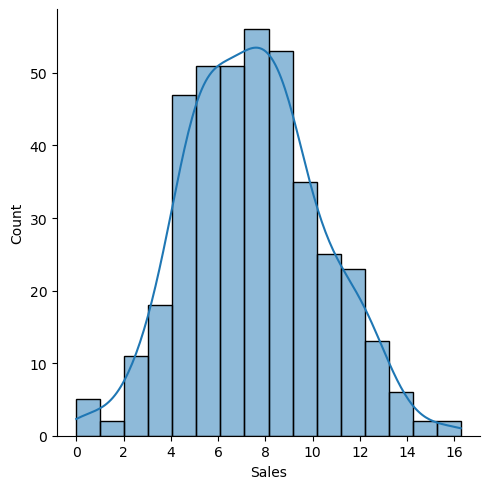

In [194]:
# plot the sales distribution
sns.displot(dfSales.Sales, kde=True)
plt.show()

Text(0, 0.5, 'Sales')

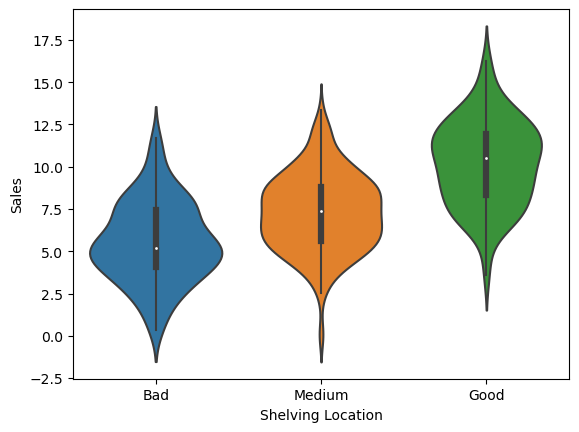

In [195]:
# plot the sales distribution by shelving location using a violin plot, ordering bad, medium, good
sns.violinplot(x="ShelveLoc", y="Sales", data=dfSales, order=["Bad", "Medium", "Good"])
# set axis labels
plt.xlabel("Shelving Location")
plt.ylabel("Sales")

In [196]:
# scatterplots with regression lines

<Axes: xlabel='Price', ylabel='Sales'>

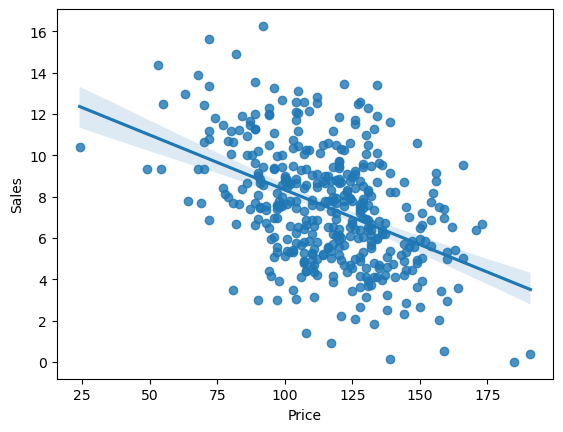

In [197]:
# scatterplot of sales vs price
sns.regplot(x="Price", y="Sales", data=dfSales)

# price strongly negatively correlated with sales

<Axes: xlabel='Income', ylabel='Sales'>

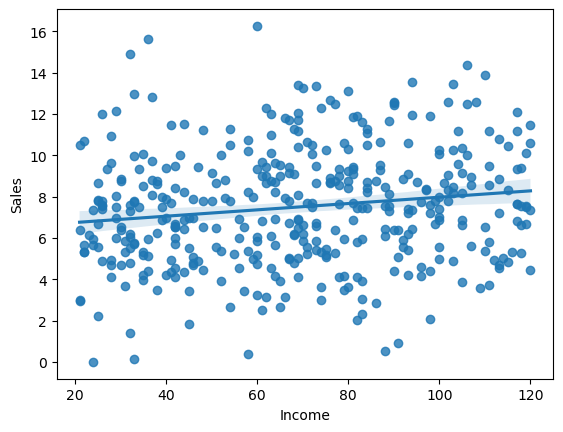

In [198]:
# scatterplot of sales vs income
sns.regplot(x="Income", y="Sales", data=dfSales)

# income slightly positively correlated with sales

<Axes: xlabel='Advertising', ylabel='Sales'>

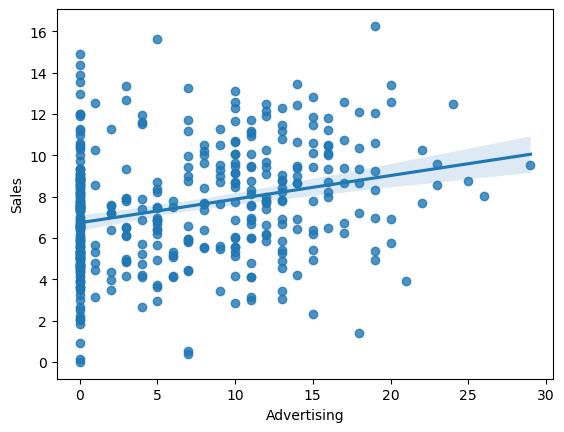

In [199]:
# scatterplot of sales vs advertising
sns.regplot(x="Advertising", y="Sales", data=dfSales)

# advertising spend positively correlated with sales

<Axes: xlabel='Population', ylabel='Sales'>

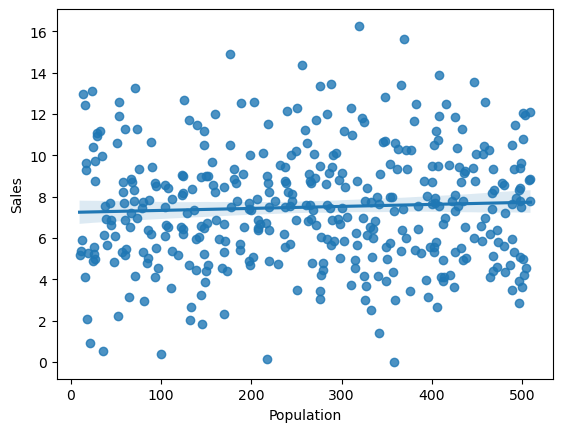

In [200]:
# scatterplot of sales vs population
sns.regplot(x="Population", y="Sales", data=dfSales)

# interestingly, there's almost no correlation between sales and population, even though one would assume that

<Axes: xlabel='Age', ylabel='Sales'>

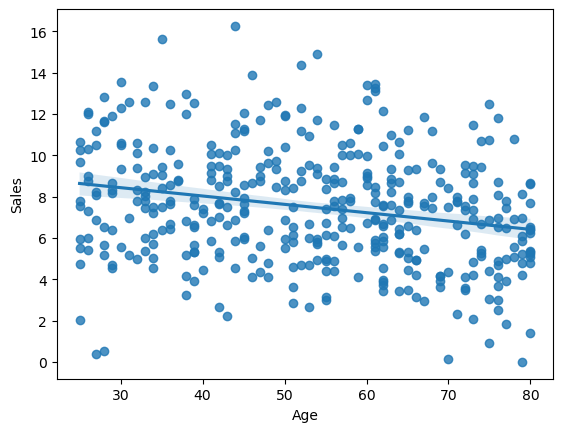

In [201]:
# scatterplot of sales vs age
sns.regplot(x="Age", y="Sales", data=dfSales)

# age slightly negatively correlated with sales, the younger the population, the higher the sales --> more children

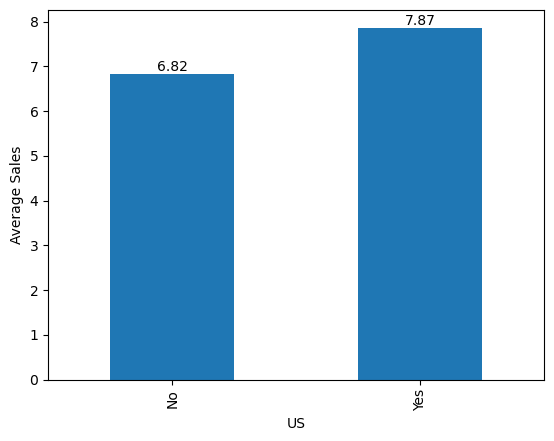

In [202]:
# average sales for US vs non-US locations, plot as bar chart
dfSales.groupby("US").Sales.mean().plot(kind="bar")
plt.ylabel("Average Sales")
# add value labels
for i in range(len(dfSales.groupby("US").Sales.mean())):
    plt.text(x=i, y=dfSales.groupby("US").Sales.mean()[i], s=round(dfSales.groupby("US").Sales.mean()[i], 2), 
             ha="center", va="bottom")

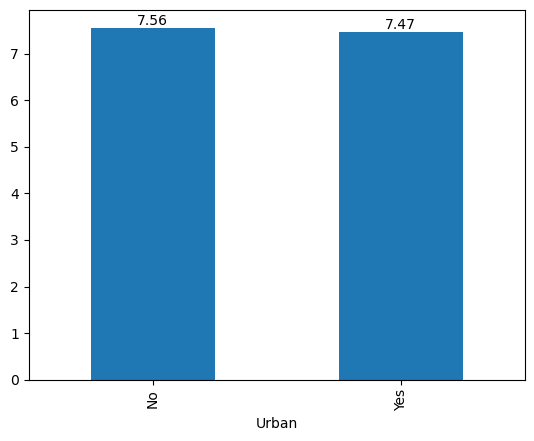

In [203]:
# average sales by urban vs rural, plot as bar chart
dfSales.groupby("Urban").Sales.mean().plot(kind="bar")
# add value labels
for i, v in enumerate(dfSales.groupby("Urban").Sales.mean()):
    plt.text(i, v, round(v, 2), ha="center", va="bottom")

# New feature - difference CompPrice and Price

In [204]:
# create a new feature CompPriceDiff as the difference between the price and the competition price
dfSales["CompPriceDiff"] = dfSales.Price - dfSales.CompPrice

<Axes: xlabel='CompPriceDiff', ylabel='Sales'>

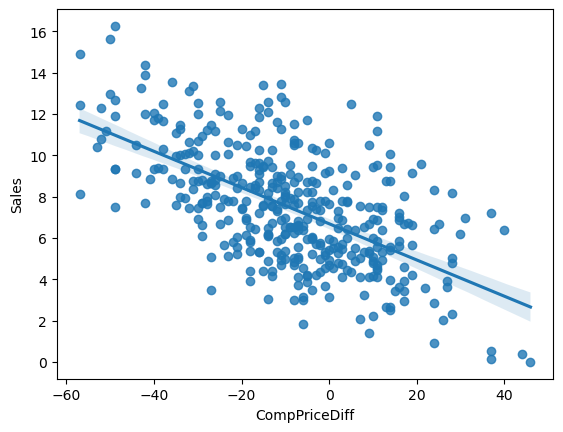

In [205]:
# scatterplot of sales vs CompPriceDiff
sns.regplot(x="CompPriceDiff", y="Sales", data=dfSales)

# highly negatively correlated with sales

# Correlation

In [206]:
# US - replace yes/no with 1/0
dfSales.US = dfSales.US.replace({"Yes": 1, "No": 0})

# Urban - replace yes/no with 1/0
dfSales.Urban = dfSales.Urban.replace({"Yes": 1, "No": 0})

# ShelveLoc - replace bad/medium/good with 0/1/2
dfSales.ShelveLoc = dfSales.ShelveLoc.replace({"Bad": 0, "Medium": 1, "Good": 2})

# check the data
dfSales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff
0,9.50,138,73,11,276,120,0,42,17,1,1,-18
1,11.22,111,48,16,260,83,2,65,10,1,1,-28
2,10.06,113,35,10,269,80,1,59,12,1,1,-33
3,7.40,117,100,4,466,97,1,55,14,1,1,-20
4,4.15,141,64,3,340,128,0,38,13,1,0,-13


<Axes: >

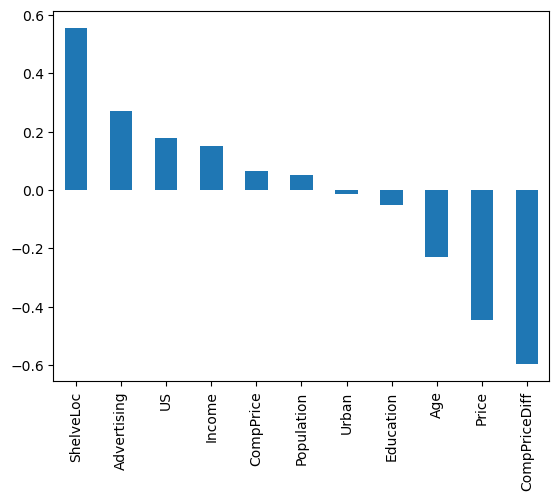

In [207]:
# correlation matrix
dfSales.corr()

# correlation with sales, plotted, sorted, without sales
dfSales.corr().Sales.sort_values(ascending=False)[1:].plot(kind="bar")

# Preprocessing - Standard Scaler

In [208]:
# since we have different scales, we need to standardize the data for the continuous variables
# create a new dataframe with the standardized values
dfSalesScaled = dfSales.copy()

# standardize the continuous variables
scaler = StandardScaler()

# fit the scaler
scaler.fit(dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])

# transform the data
dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]] = scaler.transform(dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])

# check the data
dfSalesScaled.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff
0,9.50,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,-0.458454
1,11.22,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,2,0.721723,-1.490113,1,1,-0.978243
2,10.06,-0.781896,-1.204159,0.506621,0.028262,-1.513719,1,0.350895,-0.725953,1,1,-1.238138
3,7.40,-0.520720,1.121336,-0.396715,1.366649,-0.794814,1,0.103677,0.038208,1,1,-0.562412
4,4.15,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,-0.198559


# Modelling

In [209]:
# set up the features and target
X = dfSalesScaled.drop(columns=["Sales"])
y = dfSalesScaled.Sales

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [210]:
# set up a dataframe to store the results
dfResults = pd.DataFrame(columns=["Model", "MSE", "MAE", "R2"])

## Decision tree

In [211]:
# hyperparameter tuning for random forest regressor
# initialize the model
rf = RandomForestRegressor(random_state=123)


# set up the parameter grid
param_grid = {
    "n_estimators": [10, 25, 50, 100, 200, 400, 800],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

# set up the grid search
gridSearch = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
gridSearch.best_params_

# best score
gridSearch.best_score_

# best estimator
gridSearch.best_estimator_

# set up random forest regressor with best parameters
rf = gridSearch.best_estimator_

In [212]:
# fit the model
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe
dfResults = dfResults.append({"Model": "Random Forest Regressor", "MSE": mean_squared_error(y_test, y_pred, squared=False), 
                              "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)

Mean Squared Error:  1.7868723292808284
Mean Absolute Error:  1.0388548223327714
R2 Score:  0.7264819755993119


/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_38858/2560025554.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "Random Forest Regressor", "MSE": mean_squared_error(y_test, y_pred, squared=False),


## Multivariate Linear Regression

In [213]:
# set up multilinear regression
mlr = LinearRegression()

# hyperparameter tuning for multilinear regression
# set up the parameter grid
param_grid = {"fit_intercept": [True, False]
              }

# set up the grid search
gridSearch = GridSearchCV(mlr, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
print(gridSearch.best_params_)

# best score
print("Best score: {:.2f}".format(gridSearch.best_score_))

# best estimator
print(gridSearch.best_estimator_)

# set up multilinear regression with best parameters
mlr = gridSearch.best_estimator_

{'fit_intercept': True}
Best score: -1.13
LinearRegression()


In [214]:
# fit the model
mlr.fit(X_train, y_train)

# predict on the test set
y_pred = mlr.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe

dfResults = dfResults.append({"Model": "Multilinear Regression", "MSE": mean_squared_error(y_test, y_pred, squared=False),
                                "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)


Mean Squared Error:  1.2036032902922262
Mean Absolute Error:  0.8811597763633688
R2 Score:  0.8157634495043106


/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_38858/3440100319.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "Multilinear Regression", "MSE": mean_squared_error(y_test, y_pred, squared=False),


## Multilayer Perceptron

In [223]:
# hyperparameter tuning for MLP regressor
# initialize the MLP regressor
mlp = MLPRegressor(random_state=123)

# set up the parameter grid
param_grid = {"hidden_layer_sizes": [(50, 50), (100, 100), (50, 50, 50), (100, 100, 100)],
              "activation": ["logistic", "tanh", "relu"],
              "alpha": [0.0001, 0.001, 0.01, 0.1],
              "max_iter": [2000, 4000, 8000],
              }

# set up the grid search
gridSearch = GridSearchCV(mlp, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
print(gridSearch.best_params_)

# best score
print("Best score: {:.2f}".format(gridSearch.best_score_))

# best estimator
print(gridSearch.best_estimator_)

# set up MLP regressor with best parameters
mlp = gridSearch.best_estimator_

In [219]:
# fit the model
mlp.fit(X_train, y_train)

# predict on the test set
y_pred = mlp.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe
dfResults = dfResults.append({"Model": "MLP Regressor", "MSE": mean_squared_error(y_test, y_pred, squared=False),
                              "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)

Mean Squared Error:  1.1953790491587655
Mean Absolute Error:  0.8776082063822936
R2 Score:  0.8170223408924404


/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_38858/1666555972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "MLP Regressor", "MSE": mean_squared_error(y_test, y_pred, squared=False),


# Model selection

In [ ]:
# print the results, basing the decision on the order on the MSE
dfResults.sort_values(by="MSE")

# Predicting unseen data

In [ ]:
# fabricate a dataset of 10 new observations by sampling from the unique values of each feature, but not copying full rows
# create a new dataframe
dfNew = pd.DataFrame(columns=["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "US", "Urban"])

# create a list of unique values for each feature
compPrice = dfSales.CompPrice.unique()
income = dfSales.Income.unique()
advertising = dfSales.Advertising.unique()
population = dfSales.Population.unique()
price = dfSales.Price.unique()
age = dfSales.Age.unique()
education = dfSales.Education.unique()
shelveLoc = dfSales.ShelveLoc.unique()
us = dfSales.US.unique()
urban = dfSales.Urban.unique()

# sample from the unique values
dfNew.CompPrice = np.random.choice(compPrice, size=10)
dfNew.Income = np.random.choice(income, size=10)
dfNew.Advertising = np.random.choice(advertising, size=10)
dfNew.Population = np.random.choice(population, size=10)
dfNew.Price = np.random.choice(price, size=10)
dfNew.Age = np.random.choice(age, size=10)
dfNew.Education = np.random.choice(education, size=10)
dfNew.ShelveLoc = np.random.choice(shelveLoc, size=10)
dfNew.US = np.random.choice(us, size=10)
dfNew.Urban = np.random.choice(urban, size=10)

# check the data
dfNew.head()